# Auswertung Pair Experiment

### Seminar Visuelle Wahrnehmung beim Mensch und Bildqualität 

In [1]:
import pandas as pd    # module to work with data in DataFrames.
import numpy as np
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt

In [2]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'

In [3]:
def add_name_and_response(df, name):
    image_name = df['image_a'].str.split("_", n = 1, expand = True)[0]
    df.insert(1, 'name', image_name)
    df['observer'] = name
    return df
    

In [4]:
# we read the data
chris = pd.read_csv('pair_results/chris_pair_result_1.csv')
clemens = pd.read_csv('pair_results/clemens_pair_result_1.csv')
daniel = pd.read_csv('pair_results/daniel_pair_result_2.csv')
jenny = pd.read_csv('pair_results/jenny_pair_result_1.csv')
katja = pd.read_csv('pair_results/katja_pair_result_1.csv')
laurenz = pd.read_csv('pair_results/laurenz_pair_result_1.csv')
paul = pd.read_csv('pair_results/paul_pair_result_1.csv')
dominik = pd.read_csv('pair_results/dominik_pair_result_1.csv')

df1 = add_name_and_response(chris, 'Chris')
df2 = add_name_and_response(clemens, 'Clemens')
df3 = add_name_and_response(daniel, 'Daniel')
df4 = add_name_and_response(jenny, 'Jenny')
df5 = add_name_and_response(katja, 'Katja')
df6 = add_name_and_response(laurenz, 'Laurenz')
df7 = add_name_and_response(paul, 'Paul')
df8 = add_name_and_response(dominik, 'Dominik')

df = pd.concat((df1, df2, df3, df4, df5, df6, df7, df8))
df_sanity = df1

observers = ['Chris', 'Clemens', 'Daniel', 'Jenny', 'Katja', 'Laurenz', 'Paul', 'Dominik']

# if we have more observers we could read their files, assign the column observer 
# with their name, and concatenate the DataFrames with pd.concat(). Example:
# df1 = pd.read_csv('Person1.csv')
# df1['observer'] = 'Person1'      # creates a new column called 'observer'
# df2 = pd.read_csv('Person2.csv') # reads second file
# df2['observer'] = 'Person2'     
# df = pd.concat((df, df2))        # concatenates both dataframes in one


In [5]:
# explore the first entries in your data
df.head()

,usage,name,image_a,image_b,f_a_og,f_b_og,f_a,f_b,i_a,i_b,chosen_f_og,chosen_f,chosen_i,left_right,resptime,observer
0,no,Girl1,Girl1_Juno_25.jpg,Girl1_Juno_75.jpg,Juno,Juno,Juno,Juno,25,75,Juno,Juno,25,left,2.923060,Chris
1,no,Girl1,Girl1_Lark_75.jpg,Girl1_Lark_100.jpg,Lark,Lark,Lark,Lark,75,100,Lark,Lark,75,left,2.233567,Chris
2,no,Girl2,Girl2_Juno_50.jpg,Girl2_Lark_100.jpg,Juno,Lark,Juno,Lark,50,100,Juno,Juno,50,left,2.932838,Chris
3,no,Girl2,Girl2_OG.jpg,Girl2_Clarendon_50.jpg,OG,Clarendon,Clarendon,Clarendon,0,50,Clarendon,Clarendon,50,right,1.614858,Chris
4,no,Girl1,Girl1_Lark_50.jpg,Girl1_Clarendon_100.jpg,Lark,Clarendon,Lark,Clarendon,50,100,Lark,Lark,50,left,1.464137,Chris


In [6]:
# sanity checks: how many groups do you expect per categorical variable?
# in these data we expect :
# 5 different k values
print(df['name'].unique())

['Girl1' 'Girl2']


In [7]:
# 5 different g values
print(df['observer'].unique())

['Chris' 'Clemens' 'Daniel' 'Jenny' 'Katja' 'Laurenz' 'Paul' 'Dominik']


In [8]:
# 15 different pictures
print(df['chosen_f'].unique())

['Juno' 'Lark' 'Clarendon']


In [9]:
# We expect 40 for same filter comparisons and 32 for mixed filter comparisons
# Same filter comparisons have 8 additional comparisons, since filter intensity 0 
# is only compared to the same filter type. 
# E.g. juno_0 is compared to juno_25, juno_50, juno_75, juno_100 ==> 4 comparisons x 2 images = 8
# For two different filters, we expect 32 comparisons, since each has 4 intensities
# 4x4x2 = 32

filters = ['Juno', 'Lark', 'Clarendon']

for f_a in filters:
    for f_b in filters:
        d1, d2 = df_sanity[df_sanity['f_a'] == f_a], df_sanity[df_sanity['f_a'] == f_b]
        print(len(d1[d1['f_b'] == f_b]) + len(d2[d2['f_b'] == f_a]))



40
32
32
32
40
32
32
32
40


In [10]:
# selecting data for only one picture
picname = 'Girl1'
#d= df[df['name'] == picname]
d = df


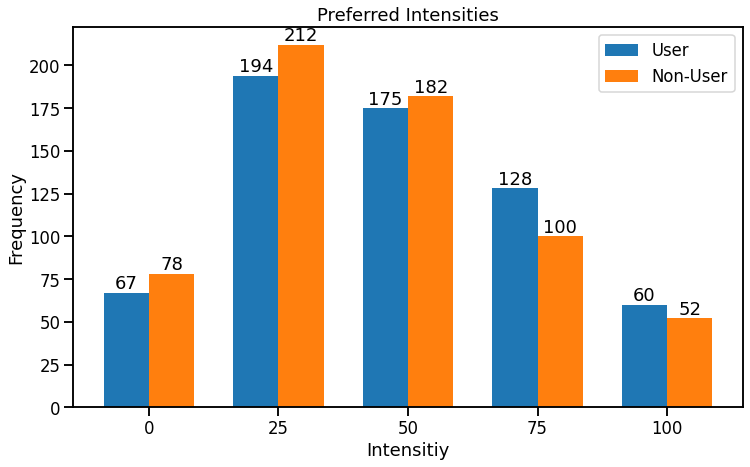

In [11]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']

(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, ax = plt.subplots(figsize=(12,7))
p1 = ax.bar(x - width/2, user_counts, width=width, label='User')
p2 = ax.bar(x + width/2, non_user_counts, width=width, label='Non-User')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(p1)
ax.bar_label(p2)
ax.set_xlabel('Intensitiy')
ax.set_ylabel('Frequency')

plt.title('Preferred Intensities')

plt.legend()
plt.savefig('Pref_ints_bar.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")

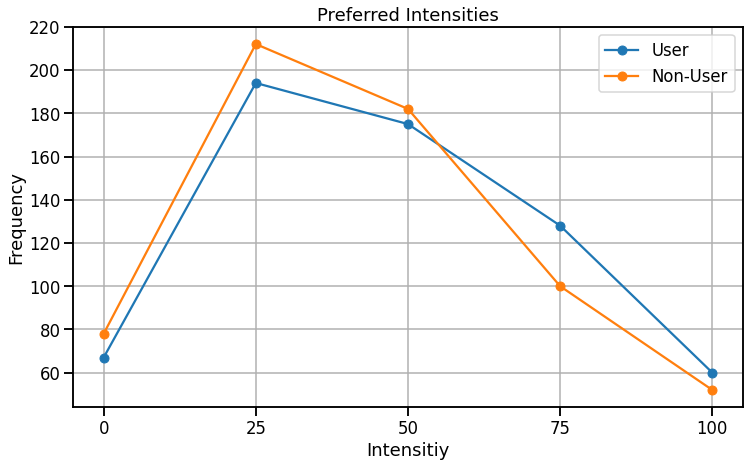

In [12]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']

(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12,7))
ax.grid()
ax.plot(x, user_counts, linestyle='-', marker='o', label='User')
ax.plot(x, non_user_counts, linestyle='-', marker='o', label='Non-User')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Intensitiy')
ax.set_ylabel('Frequency')

plt.title('Preferred Intensities')

plt.legend();
plt.savefig('Pref_ints_graph.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")


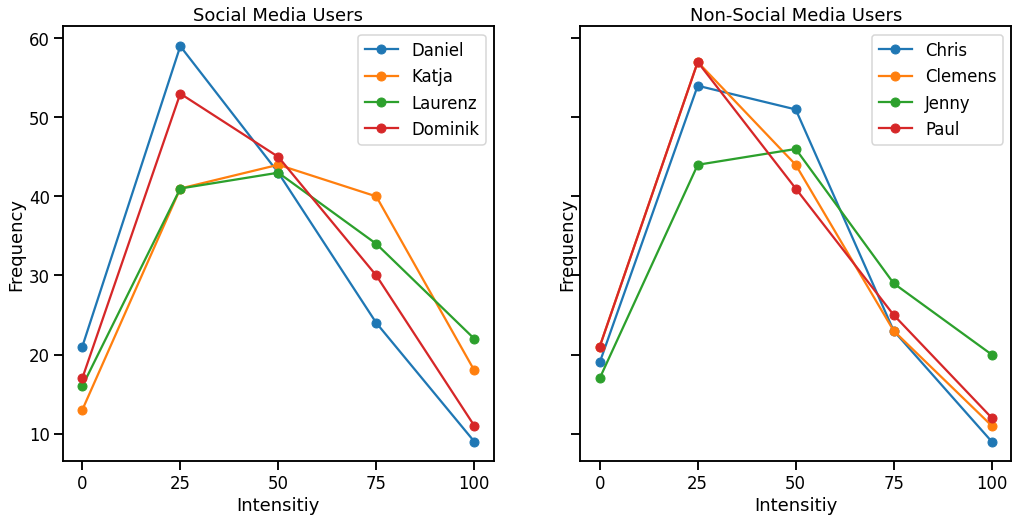

In [13]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']

#(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
#(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

users = ['Daniel', 'Katja', 'Laurenz', 'Dominik']
non_users = ['Chris', 'Clemens', 'Jenny', 'Paul']

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))


fig, axis = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(17,8))



ax = axis[0]

for u in users:
    observ = user.loc[user['observer'] == u]
    (unique, counts) = np.unique(observ['chosen_i'], return_counts=True)
    ax.plot(x, counts, linestyle='-', marker='o', label=u)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Intensitiy')
    ax.set_ylabel('Frequency')
    ax.grid()
    ax.legend()
    ax.set_title('Social Media Users')

ax = axis[1]    

for nu in non_users:
    observ = non_user.loc[non_user['observer'] == nu]
    (unique, counts) = np.unique(observ['chosen_i'], return_counts=True)
    ax.plot(x, counts, linestyle='-', marker='o', label=nu)  
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Intensitiy')
    ax.set_ylabel('Frequency')
    ax.grid()
    ax.legend()
    ax.set_title('Non-Social Media Users')


plt.savefig('Pref_ints_groups.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")



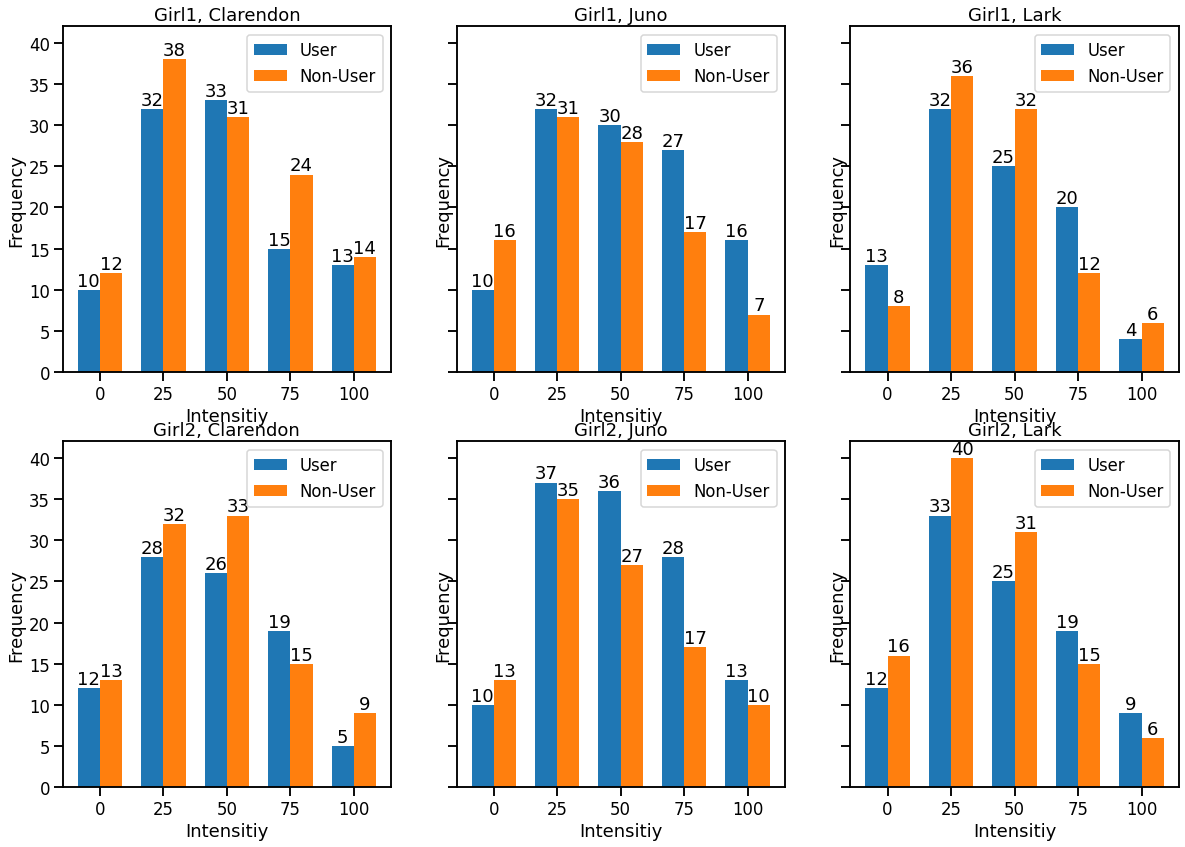

In [14]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']
filters = ['Clarendon', 'Juno', 'Lark']
images = ['Girl1', 'Girl2']

(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, axis = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20,14))

for row, img in zip(range(2), images):
    for col, fi in zip(range(3), filters):
        ax = axis[row, col]
        
        user_f = user.loc[user['name'] == img]
        user_f = user_f.loc[user_f['chosen_f'] == fi]
        
        non_user_f = non_user.loc[user['name'] == img]
        non_user_f = non_user_f.loc[non_user_f['chosen_f'] == fi]
        
        (unique, user_counts) = np.unique(user_f['chosen_i'], return_counts=True)
        (unique, non_user_counts) = np.unique(non_user_f['chosen_i'], return_counts=True)
        p1 = ax.bar(x - width/2, user_counts, width=width, label='User')
        p2 = ax.bar(x + width/2, non_user_counts, width=width, label='Non-User')

        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.bar_label(p1)
        ax.bar_label(p2)
        ax.set_xlabel('Intensitiy')
        ax.set_ylabel('Frequency')

        ax.set_title(img + ', '+ fi)
        ax.legend()

plt.legend()
plt.savefig('group_abs.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")


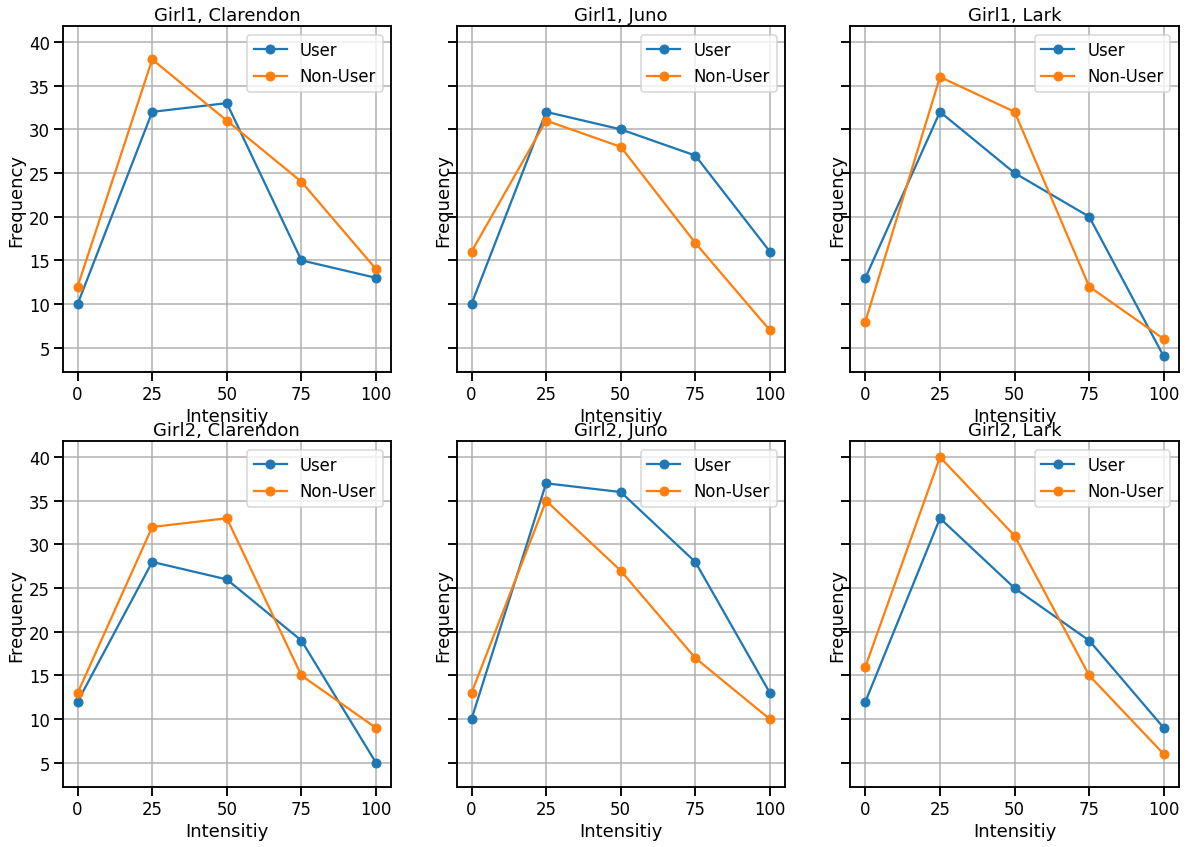

In [15]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']
filters = ['Clarendon', 'Juno', 'Lark']
images = ['Girl1', 'Girl2']

(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, axis = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(20,14))

for row, img in zip(range(2), images):
    for col, fi in zip(range(3), filters):
        ax = axis[row, col]
        
        user_f = user.loc[user['name'] == img]
        user_f = user_f.loc[user_f['chosen_f'] == fi]
        
        non_user_f = non_user.loc[user['name'] == img]
        non_user_f = non_user_f.loc[non_user_f['chosen_f'] == fi]
        
        (unique, user_counts) = np.unique(user_f['chosen_i'], return_counts=True)
        (unique, non_user_counts) = np.unique(non_user_f['chosen_i'], return_counts=True)
        ax.grid()
        ax.plot(x, user_counts, linestyle='-', marker='o', label='User')
        ax.plot(x, non_user_counts, linestyle='-', marker='o', label='Non-User')
        
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.set_xlabel('Intensitiy')
        ax.set_ylabel('Frequency')

        ax.set_title(img + ', '+ fi)
        ax.legend()

plt.legend()
plt.savefig('group_graph.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")

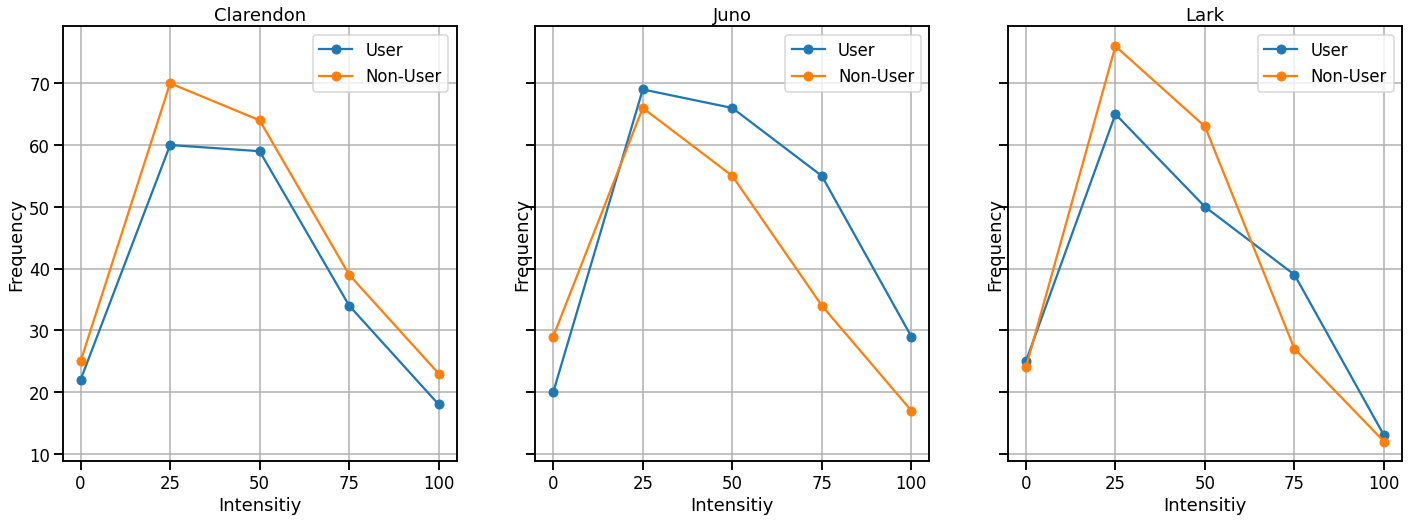

In [16]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']
filters = ['Clarendon', 'Juno', 'Lark']


(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, axis = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(24,8))


for col, fi in zip(range(3), filters):
    ax = axis[col]

    user_f = user.loc[user['chosen_f'] == fi]
    non_user_f = non_user.loc[non_user['chosen_f'] == fi]

    (unique, user_counts) = np.unique(user_f['chosen_i'], return_counts=True)
    (unique, non_user_counts) = np.unique(non_user_f['chosen_i'], return_counts=True)
    ax.grid()
    ax.plot(x, user_counts, linestyle='-', marker='o', label='User')
    ax.plot(x, non_user_counts, linestyle='-', marker='o', label='Non-User')

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Intensitiy')
    ax.set_ylabel('Frequency')

    ax.set_title(fi)
    ax.legend()

plt.legend()
plt.savefig('group_graph.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")

In [17]:
def compute_means_and_std(d_frame, observers):
    user = d_frame
    user_count = {'0': [], '25': [], '50': [], '75': [], '100': []}

    for observer in observers:
        u_name = user.loc[user['observer'] == observer]
        (unique, user_counts) = np.unique(u_name['chosen_i'], return_counts=True)

        for intens, count in zip(unique, user_counts):
            user_count[str(intens)].append(count)

    user_means, user_std = [], []

    keys = ['0', '25', '50', '75', '100']
    
    for key in keys:
        user_means.append(np.mean(user_count[key]))
        user_std.append(np.std(user_count[key]))


    return np.asarray(user_means), np.asarray(user_std)

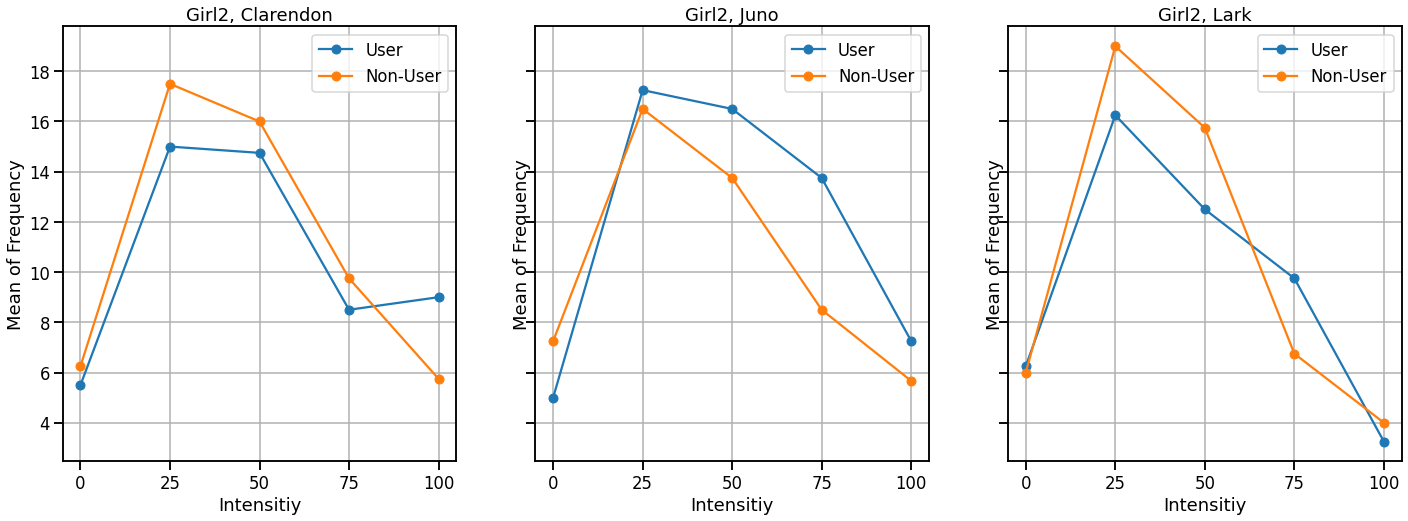

In [18]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']
filters = ['Clarendon', 'Juno', 'Lark']
images = ['Girl1', 'Girl2']

(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, axis = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(24,8))


for col, fi in zip(range(3), filters):
    ax = axis[col]


    user_f = user.loc[user['chosen_f'] == fi]


    non_user_f = non_user.loc[non_user['chosen_f'] == fi]

    user_means, user_std = compute_means_and_std(user_f, observers)
    non_user_means, non_user_std = compute_means_and_std(non_user_f, observers)

    ax.grid()
    ax.plot(x, user_means, linestyle='-', marker='o', label='User')
    ax.plot(x, non_user_means, linestyle='-', marker='o', label='Non-User')

    #ax.plot(x, user_means + user_std / 2 , '--', c='b', alpha= 0.3, label='User std')
    #ax.plot(x, user_means - user_std / 2 , '--', c='b', alpha= 0.3)
    #ax.plot(x, non_user_means + non_user_std / 2 , '--', c='orange', alpha= 0.6, label='Non-User std')
    #ax.plot(x, non_user_means - non_user_std / 2 , '--', c='orange', alpha= 0.6)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Intensitiy')
    ax.set_ylabel('Mean of Frequency')

    ax.set_title(img + ', '+ fi)
    ax.legend()

plt.legend();

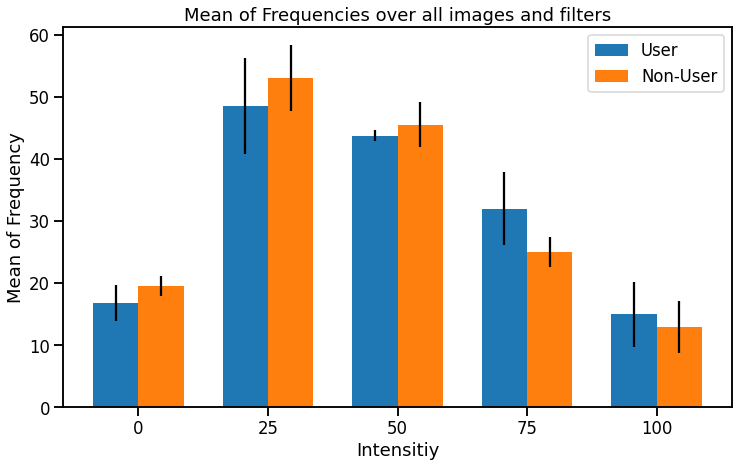

In [19]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']
filters = ['Clarendon', 'Juno', 'Lark']
images = ['Girl1', 'Girl2']

(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, ax = plt.subplots(figsize=(12,7))

user_means, user_std = compute_means_and_std(user, observers)
non_user_means, non_user_std = compute_means_and_std(non_user, observers)

p1 = ax.bar(x - width/2, user_means, yerr=user_std, width=width, label='User')
p2 = ax.bar(x + width/2, non_user_means, yerr=non_user_std, width=width, label='Non-User')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Intensitiy')
ax.set_ylabel('Mean of Frequency')

ax.set_title('Mean of Frequencies over all images and filters')
ax.legend()

plt.legend()
plt.savefig('means.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")

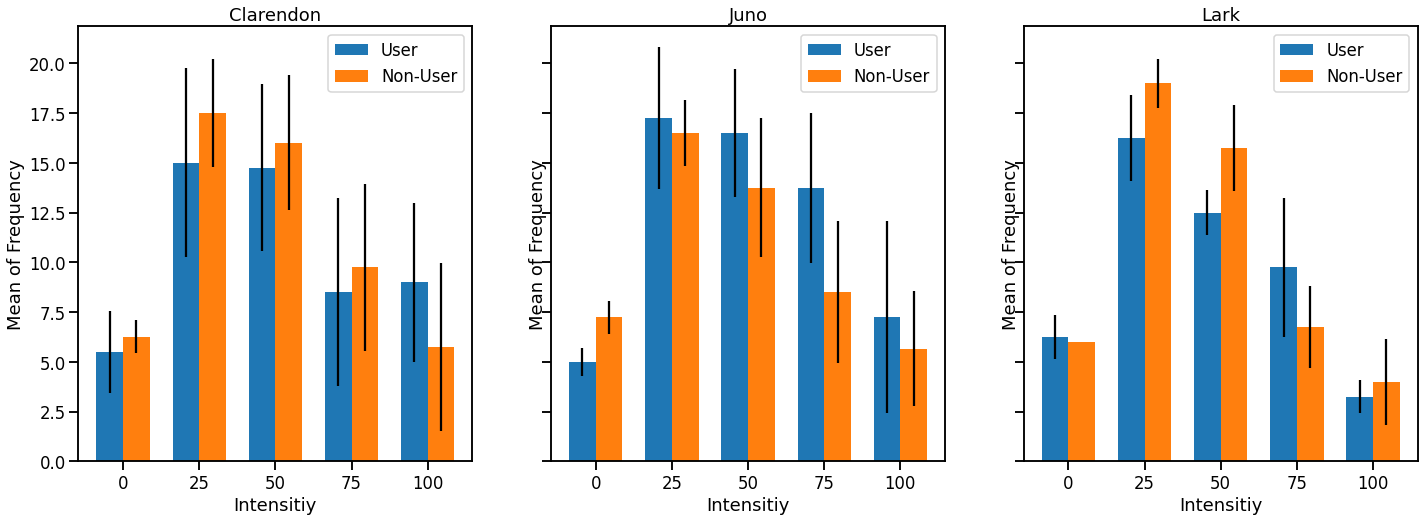

In [20]:
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']
filters = ['Clarendon', 'Juno', 'Lark']
images = ['Girl1', 'Girl2']

(unique, user_counts) = np.unique(user['chosen_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['chosen_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, axis = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(24,8))


for col, fi in zip(range(3), filters):
    ax = axis[col]


    user_f = user.loc[user['chosen_f'] == fi]
    non_user_f = non_user.loc[non_user['chosen_f'] == fi]

    user_means, user_std = compute_means_and_std(user_f, observers)
    non_user_means, non_user_std = compute_means_and_std(non_user_f, observers)

    p1 = ax.bar(x - width/2, user_means, yerr=user_std, width=width, label='User')
    p2 = ax.bar(x + width/2, non_user_means, yerr=non_user_std, width=width, label='Non-User')

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_xlabel('Intensitiy')
    ax.set_ylabel('Mean of Frequency')

    ax.set_title(fi)
    ax.legend()

plt.legend()
plt.savefig('mean_group.png', dpi=300, bbox_inches='tight', pad_inches = 0.3, facecolor ="w")

## Visualizing data from all pictures

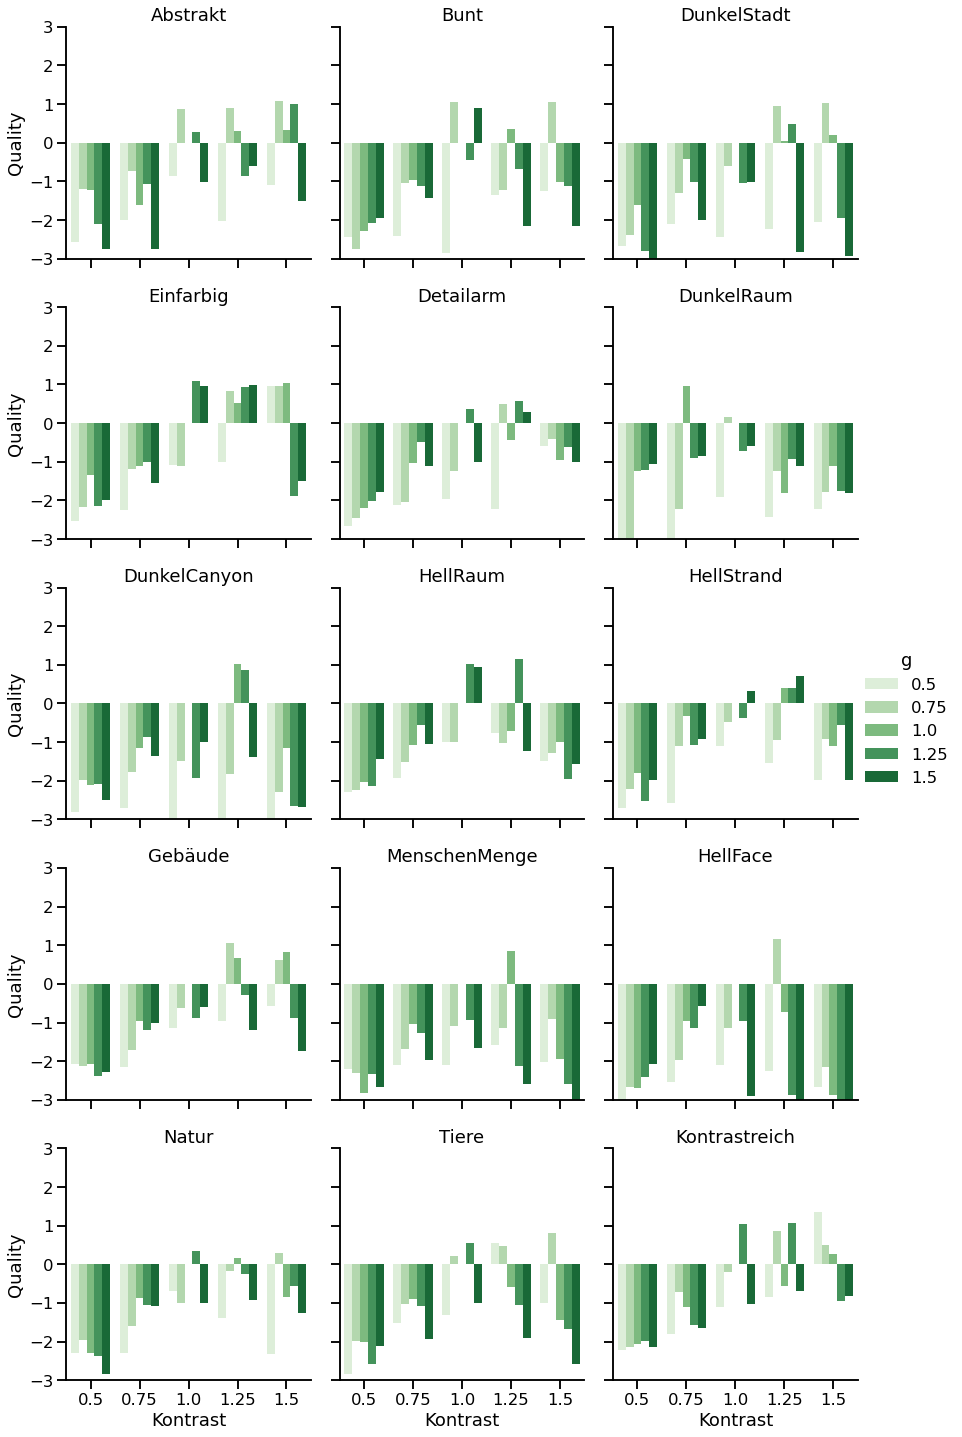

In [19]:
# %%  Using small multiples to visualize data from all pictures in one figure 
g = sns.catplot(x='chosen_i', y='quality_value', data=df, hue='chosen_f',
                col='picture', col_wrap = 3, kind='bar', ci='sd', height=4,
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('Kontrast')
g.set_titles('{col_name}')
g.set(ylim = (-3, 3))
#g.savefig('allpictures_in_different_panels.pdf')


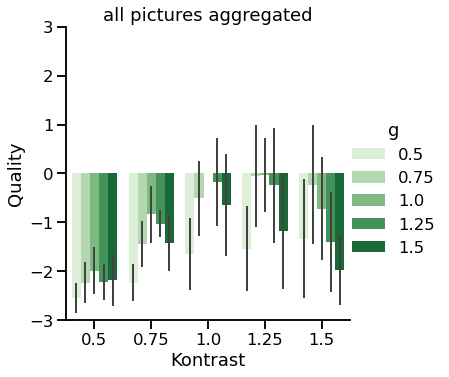

In [20]:
# %% collapsing all pictures into one visualization
g = sns.catplot(x='k', y='quality_value', data=df, hue='g',
                kind='bar', ci='sd', errwidth=2,
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('Kontrast')
g.set(ylim = (-3, 3))
plt.title('all pictures aggregated')
g.savefig('allpictures_aggregated.pdf')



## Some statistical analysis

In [21]:
# we load scipy
import scipy

### t-test 
With a t-test we can test whether the values of two groups have the same mean. The null-hypothesis states that the mean difference between the two samples is zero. 
The test gives us a 'p-value', the conditional probability for the observed difference between means under the assumption (condition) that the null-hypothesis is true. When the p-value is smaller than a criterion value (0.05 for 95 % confidence by convention), we say we *reject* the null-hypothesis. In other words, a p value <.05 indicates that the difference between the two samples is unlikely to be truly zero.

In [22]:
# we select the data we want to compare. We select the data for k=0.5 and k=1.5 
# and assign them to two vectors, y1 and y2
k1 = df[df['k']==0.5]
k2 = df[df['k']==1.0]

k1
#k1['quality_value']


,k,g,picture,brightness,quality_value
7,0.5,0.75,Detailarm,195.980923,-2.45
11,0.5,1.50,DunkelRaum,84.542856,-1.05
12,0.5,0.75,Einfarbig,214.433419,-2.16
22,0.5,1.25,DunkelStadt,57.461933,-2.80
25,0.5,0.75,Abstrakt,37.192704,-1.21
...,...,...,...,...,...
331,0.5,1.00,HellFace,207.936104,-2.70
333,0.5,1.00,Kontrastreich,128.555497,-2.06
334,0.5,1.25,HellRaum,181.237005,-2.13
357,0.5,0.75,HellStrand,174.530515,-2.22


In [23]:
# we call a t-test for two independent samples 
tstat, pvalue = scipy.stats.ttest_ind(k1['quality_value'], 
                                      k2['quality_value']) 

print('p-value:', pvalue)

p-value: 2.606247110907521e-21


The p-value is << 0.05, so we reject the null hypothesis and say that the difference is significant.

### ANOVA
If we want to compare the means of more than 2 groups, we need to perform an Analysis of Variance (ANOVA). The null-hypothesis in the ANOVA states that there is no difference between the means of the groups. A p-value less than 0.05 (at 95 %) rejects this general hypothesis without indicating which groups are different from one another.

In [24]:
# for an ANOVA we need the python module statsmodels (statistical models)
import statsmodels.api as sm  

# the particular function we need is called ols()
# (ols: ordinary least squares, that is the type of fitting)
from statsmodels.formula.api import ols   

In [25]:
# we need to set up a 'formula' for the model. This formula is similar to the syntax in R.

# on the left side of the tilde we put the dependent variable
# on the right side of the tilde we state the independent variables 
# the C( )  indicates that we consider the variable as a categorical variable (and not continuous)
# the sign + is not a sum, it is to indicate more than one variable.
# the sign * is not a multiplication, it is to indicate we want to also model interactions between the variables

# we call ols() passing the model 'formula'
mod = ols('quality_value ~ C(k) + C(g)', data=df)

# we fit the model
fit = mod.fit()

# we show the ANOVA table
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(k),4.0,121.098479,30.274620,40.554424,6.241619e-28
C(g),4.0,59.353084,14.838271,19.876634,9.159041e-15
Residual,351.0,262.027924,0.746518,NaN,NaN


The ANOVA table shows that for both variables k and g there is a signifficant effect (p-values < 0.05 for 95 % confidence). There is also a signifficant interaction term ('C(k):C(g)').


The p-values reject the null hypothesis, meaning that there is a significant difference between the means. But which ones? To answer that we need to perform a so-called post-hoc test. 

Post-hoc tests do all the pairwise comparisons (like a t-test), but correcting the p-value for multiple comparisons. This correction is needed because of statistical reasons. The risk of not correcting is that we will be detecting differences that are not there. (https://en.wikipedia.org/wiki/Multiple_comparisons_problem).

In [26]:
# perform multiple pairwise comparison
from statsmodels.stats.multicomp import MultiComparison

MultiComp = MultiComparison(df['quality_value'],
                             df['k'])

# the first argument is the test we will do, a t-test (same function as above)
# the second argument is the type of correction, in this case Bonferroni correction.
comp = MultiComp.allpairtest(scipy.stats.ttest_ind, method='bonf')
comp[0]


group1,group2,stat,pval,pval_corr,reject
0.5,0.75,-9.0713,0.0,0.0,True
0.5,1.0,-11.355,0.0,0.0,True
0.5,1.25,-11.0697,0.0,0.0,True
0.5,1.5,-7.3893,0.0,0.0,True
0.75,1.0,-4.4619,0.0,0.0002,True
0.75,1.25,-4.9838,0.0,0.0,True
0.75,1.5,-1.6373,0.1037,1.0,False
1.0,1.25,-0.6897,0.4916,1.0,False
1.0,1.5,1.9879,0.0489,0.4888,False
1.25,1.5,2.6678,0.0085,0.0849,False


The table shows all comparisons for k. The rightmost column says whether there is a significant difference between the groups tested (reject = True).